# Missing Values
* missing values occurs in dataset when some of he information is not stored for a variable . There 3 mechanisms 


1. Missing completely at random (MCAR)
    * MCAR is a type of missing data mechanism which the probability of a value being missing is unrelated to both the observed data and the missing data
    * If the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing

2. Missing at Random (MAR)
    * MAR is type of missing data mechanism in which the probability of the value being missing depends only on the observed data
    * but not on the missing data it self
    * If the data is MAR the missing values are systematically related to the observed data, but not to the missing data

3. Missing data not at random (MNAR)
    * Probability of missing data values depends on the value of the missing data itself
    

## Examples

In [16]:
import seaborn as sns

In [17]:
df = sns.load_dataset('titanic')

In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
# Check missing values
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# Check sum of missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [21]:
# Delete rows or data points to handle missing values
# before drop
t = df.shape
# after drop
u = df.dropna().shape

print(f"before drop shape is {t}")
print(f"after  drop shape is {u}")


before drop shape is (891, 15)
after  drop shape is (182, 15)


* Observation :Losing lot of data

In [23]:
# column wise drop
df.dropna(axis=1)


,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


### Imputation missing values

#### Mean value imputation

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

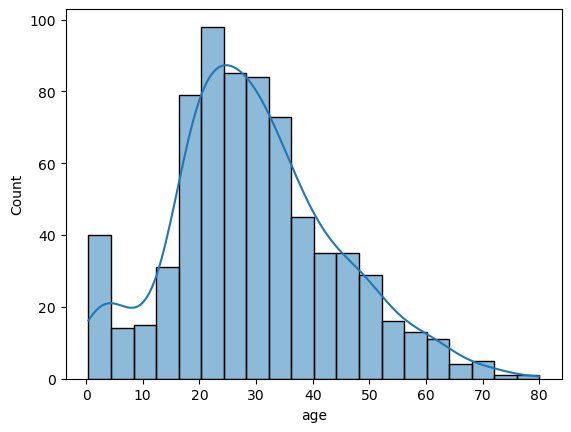

In [24]:
sns.histplot(df['age'],kde=True)

* Looks like normal distribution 

In [25]:
df['age_mean'] = df['age'].fillna(df['age'].mean())

In [26]:
df[['age_mean', 'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


* Mean imputation works well if distribution is normal

#### Median value imputation

* useful if we have outliers

In [27]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [28]:
df[['age_median', 'age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


In [29]:
df[['age_median', 'age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


#### Mode imputation

* used in catogerical variables

In [30]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [31]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
df['embarked'].notna()

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: embarked, Length: 891, dtype: bool

In [42]:
mode_embark = df[df['embarked'].notna()]['embarked'].mode()

In [48]:
mode_embark[0]

'S'

In [49]:
df['embarked_mode']= df['embarked'].fillna(mode_embark)

In [50]:
df[['embarked_mode','embarked' ]]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


# Handling imbalanced dataset

* Up Sampling
* Down Sampling


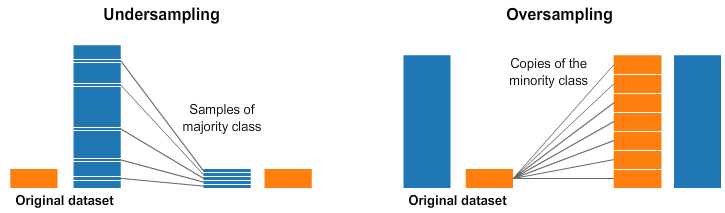

In [51]:
import numpy as np 
import pandas as pd

# Set the random seed for reproducibility 
np.random.seed(123)

# create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples-n_class_0

In [52]:
n_class_0 , n_class_1

(900, 100)

In [65]:
# create data Frame with imbalanced  dataset
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale=1 , size= n_class_0),
    'feature_2' : np.random.normal(loc=0, scale=1 , size= n_class_0),
    'target' : [1]*n_class_0 
    })

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2, scale=1 , size= n_class_1),
    'feature_2' : np.random.normal(loc=2, scale=1 , size= n_class_1),
    'target' : [0]*n_class_1 
    })

In [66]:
df = pd.concat([class_0,class_1]).reset_index(drop = True)

In [67]:
df

,feature_1,feature_2,target
0,-0.471276,0.328462,1
1,1.084072,1.038230,1
2,-0.379223,1.147064,1
3,-0.362274,0.638254,1
4,-0.681071,-1.075766,1
...,...,...,...
995,2.720690,1.978489,0
996,1.949078,3.709793,0
997,2.709784,3.324917,0
998,1.817689,1.549237,0


In [68]:
df['target'].value_counts()

target
1    900
0    100
Name: count, dtype: int64

#### Up sampling

In [82]:
df_minority = df[df['target'] == 0]
df_majority = df[df['target'] == 1]

In [83]:
from sklearn.utils import resample

In [84]:
df_minority_upsample = resample(
    df_minority,
    replace=True, # sample with replacement
    n_samples=len(df_majority), # match number in majority class 
    random_state=42)

In [85]:
df_minority_upsample.shape

(900, 3)

In [88]:
df_upsampled = pd.concat([df_majority, df_minority_upsample])

In [89]:
df_upsampled['target'].value_counts()

target
1    900
0    900
Name: count, dtype: int64

#### Down Sampling

In [90]:
df_minority = df[df['target'] == 0]
df_majority = df[df['target'] == 1]

In [91]:
df_minority_downsample = resample(
    df_majority,
    replace=False, # sample with replacement
    n_samples=len(df_minority), # match number in majority class 
    random_state=42)

In [92]:
df_minority_downsample.shape

(100, 3)

In [93]:
df_downsampled = pd.concat([df_minority, df_minority_downsample])

In [94]:
df_downsampled['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

## SMOTE (Synthetic Minority Oversampling Techniques )

* SMOTE involves generating synthetic instances  of the minority class by interpolating between existing instances

In [95]:
from sklearn.datasets import  make_classification

In [99]:
x,y = make_classification(n_samples=1000 , n_features= 2 , n_redundant=0, n_clusters_per_class= 1,weights=[0.90] , random_state=12)

In [100]:
import pandas as pd 

In [ ]:
df1 = pd.DataFrame(x , columns=['f1','f2'])
df2 = pd.DataFrame(y , columns=['target'])
final_df = pd.concat([df1,df2] , axis = 1)

In [102]:
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [103]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [104]:
import matplotlib.pyplot as plt

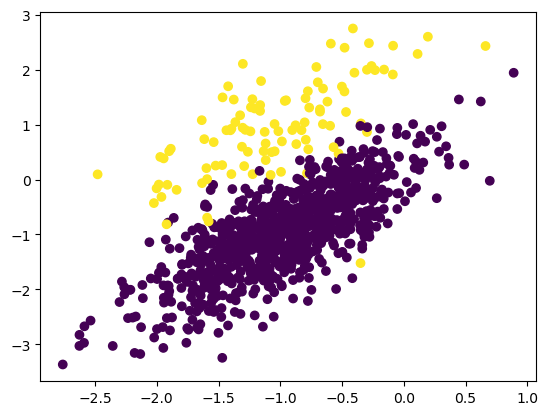

In [105]:
plt.scatter(final_df['f1'],final_df['f2'],c =final_df['target'] )

In [109]:
%pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [111]:
from imblearn.over_sampling import SMOTE

In [113]:
# Transform the dataset
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])


In [114]:
x.shape

(1800, 2)

In [115]:
y.shape

(1800,)

In [116]:
df1 = pd.DataFrame(x , columns=['f1','f2'])
df2 = pd.DataFrame(y , columns=['target'])
final_df = pd.concat([df1,df2] , axis = 1)

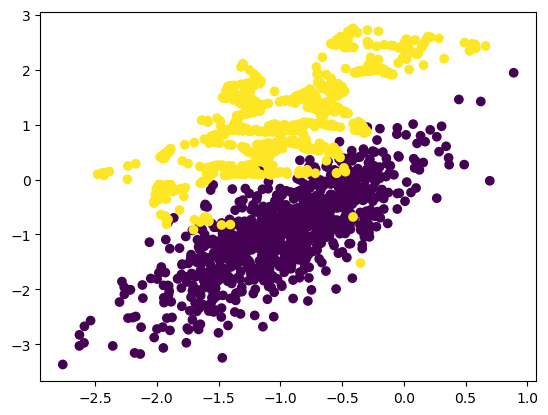

In [117]:
plt.scatter(final_df['f1'],final_df['f2'],c =final_df['target'] )

# Handling outliers 

## 5 number summary And Box plot

In [120]:
import numpy as np
import random

In [148]:
tst_marks = [random.randint(0, 100) for _ in range(20)]
tst_marks

[34, 36, 38, 93, 96, 67, 0, 97, 53, 31, 80, 53, 0, 25, 36, 22, 90, 34, 80, 82]

In [149]:
minimum , Q1 , median , Q3 , maximum = np.quantile(tst_marks, [0,0.25,0.50,0.75,1])

In [150]:
minimum , Q1 , median , Q3 , maximum

(0.0, 33.25, 45.5, 80.5, 97.0)

In [151]:
IQR = Q3 - Q1
IQR

47.25

In [152]:
lower_fence = Q1 - 1.5*(IQR)
higher_fence = Q3 + 1.5*(IQR)

In [153]:
lower_fence,higher_fence

(-37.625, 151.375)

In [154]:
import seaborn as sns

<Axes: >

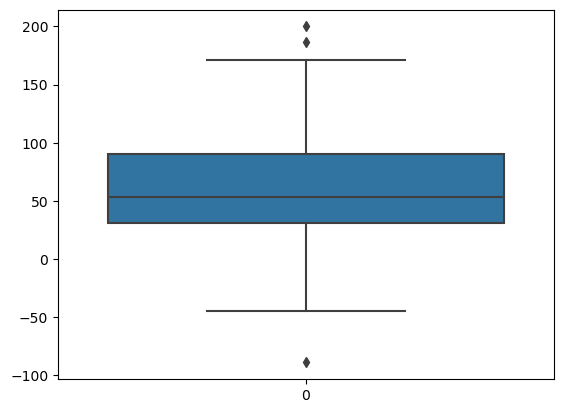

In [161]:
sns.boxplot(tst_marks)

In [157]:
tst_marks.extend([171,-45,-89,187,200])

In [158]:
tst_marks

[34,
 36,
 38,
 93,
 96,
 67,
 0,
 97,
 53,
 31,
 80,
 53,
 0,
 25,
 36,
 22,
 90,
 34,
 80,
 82,
 171,
 -45,
 -89,
 187,
 200]

<Axes: >

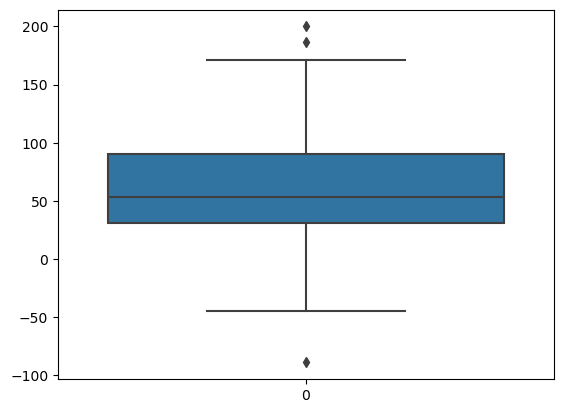

In [160]:
sns.boxplot(tst_marks)